In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "privbayes"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.056239,0.050680,0.110198,-0.005671,0.060349,-0.048286,-0.091262,-0.002592,0.119344,0.073480,99.0
1,0.023546,0.050680,-0.079497,0.125158,-0.053855,0.010586,0.181179,-0.039493,-0.035817,-0.079778,113.0
2,0.016281,0.050680,0.088642,-0.022885,0.109883,-0.013527,-0.091262,0.091875,0.085533,-0.042499,60.0
3,0.009016,-0.044642,-0.061174,0.090730,-0.103389,-0.026366,0.181179,-0.002592,0.079121,0.073480,72.0
4,-0.027310,-0.044642,-0.019140,-0.022885,0.024574,0.068831,0.048640,0.091875,0.059881,0.098333,257.0
5,-0.107226,0.050680,0.042296,-0.005671,-0.009825,-0.086490,-0.054446,-0.037648,-0.012908,-0.038357,297.0
6,0.052606,-0.044642,0.000261,0.001215,-0.103389,0.039709,-0.021311,0.025453,-0.005145,-0.042499,144.0
7,0.009016,0.050680,-0.016984,0.079254,0.001183,0.045345,-0.010266,0.052759,0.044528,-0.129483,173.0
8,0.045341,-0.044642,-0.032073,0.042530,-0.067615,0.000878,0.022869,0.037999,0.063893,0.019633,77.0
9,0.078034,0.050680,0.034751,-0.084857,-0.104765,0.045345,0.122273,0.084863,0.057104,-0.079778,69.0


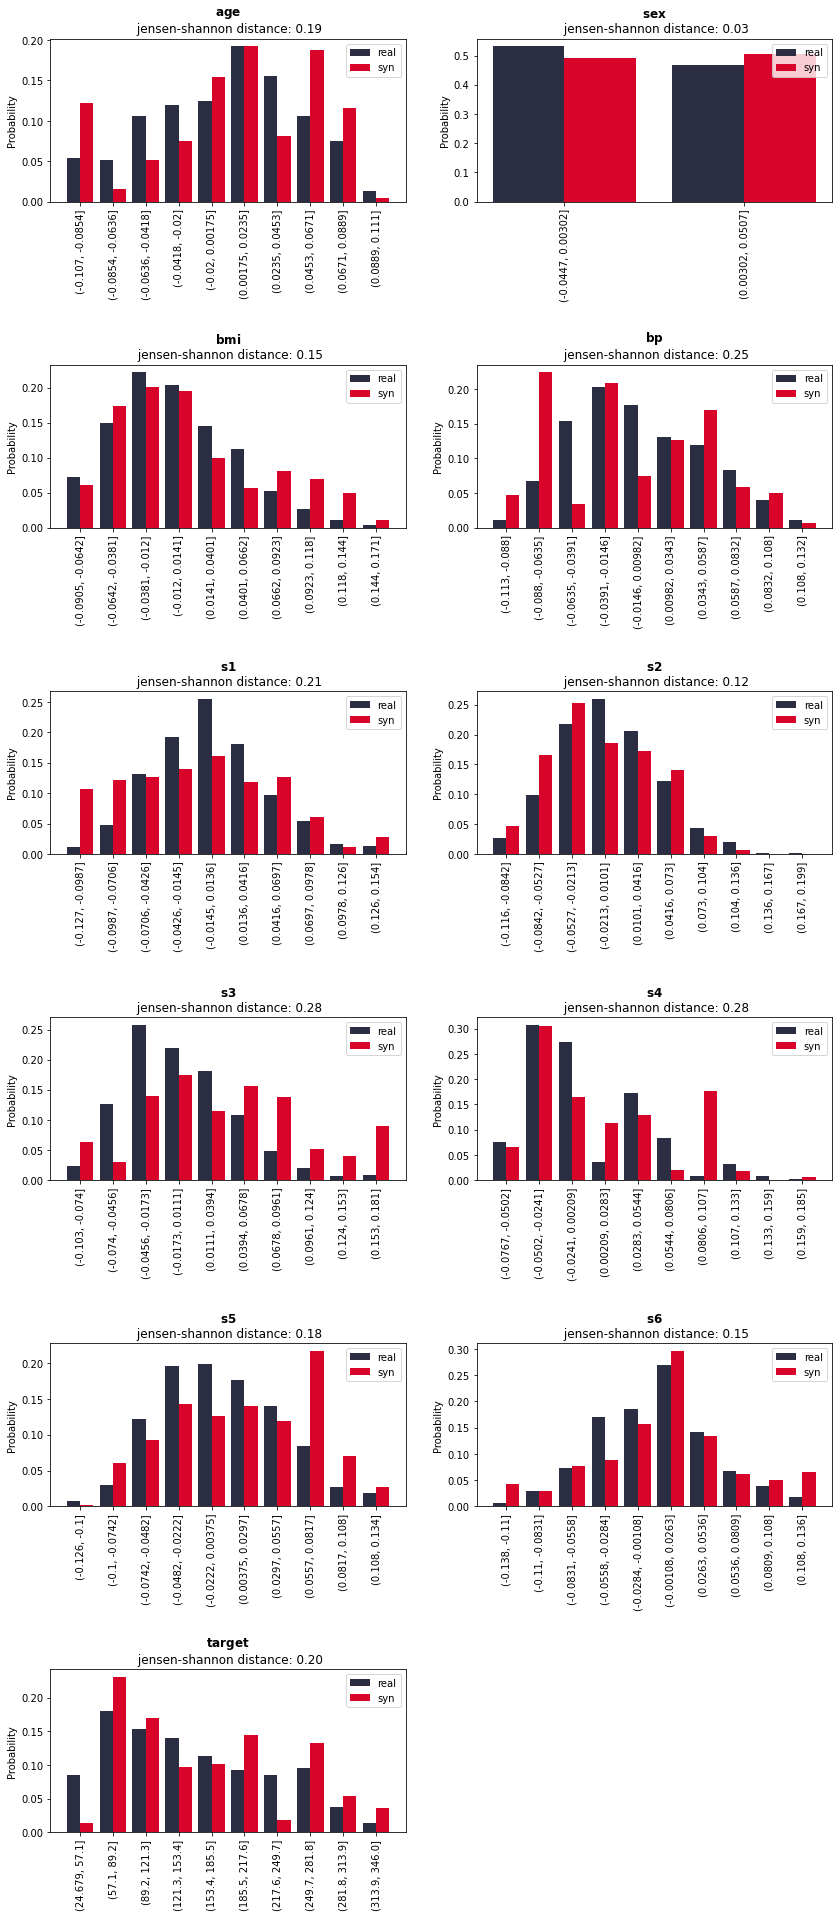

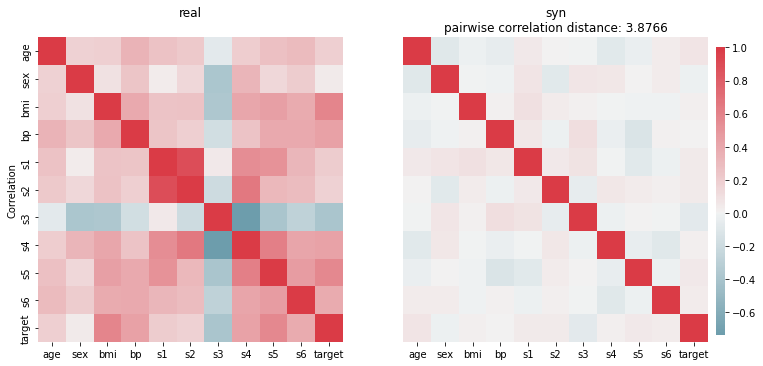

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : privbayes


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.076263,0.124017,0.092838,0.022062,0.078233,0.023877,3,0,0.01
sanity.inlier_probability,0.857466,0.943439,0.893665,0.036387,0.880090,0.042986,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,0.003771,0.001067,0.004525,0.001131,3,0,0.01
statistical.inverse_kl_divergence,0.814447,0.855811,0.832706,0.017231,0.827861,0.020682,3,0,0.01
statistical.kolmogorov_smirnov_test,0.800905,0.835459,0.820101,0.014365,0.823941,0.017277,3,0,0.01
statistical.chi_squared_test,0.628943,0.724917,0.692041,0.044630,0.722263,0.047987,3,0,0.02
statistical.maximum_mean_discrepancy,0.015579,0.017269,0.016451,0.000691,0.016506,0.000845,3,0,0.03
statistical.inverse_cdf_distance,1.630401,1.728894,1.667234,0.043875,1.642408,0.049247,3,0,4.24
